In [12]:
# scVI environment

import anndata as ad
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import umap

In [2]:
adata = ad.read("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/Colab Notebooks-Joshua/output/Larry_41201_2000.h5ad")

/opt/miniconda3/envs/scVI/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata

AnnData object with n_obs × n_vars = 41201 × 2000
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_id'

In [4]:
embedding = np.load("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/Colab Notebooks-Joshua/output/feat_bs30_sf03_temp05/scBaseEncoderFeat_Z_bs30_tau0.5.npy")
embedding

array([[0.        , 0.99301946, 0.83841175, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.9463993 , 0.16268457, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99683714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5646565 , 0.67458117, ..., 0.        , 0.        ,
        0.        ],
       [0.15664676, 0.1905549 , 0.19621651, ..., 0.        , 0.25613266,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [5]:
embedding.shape

(41201, 64)

In [6]:
adata.obsm['scContrastive'] = embedding
adata.obsm.keys()

KeysView(AxisArrays with keys: scContrastive)

In [7]:
# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(adata.obsm['scContrastive'])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [8]:
adata.obsm['X_umap'] = embedding

In [9]:
adata

AnnData object with n_obs × n_vars = 41201 × 2000
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_id'
    obsm: 'scContrastive', 'X_umap'

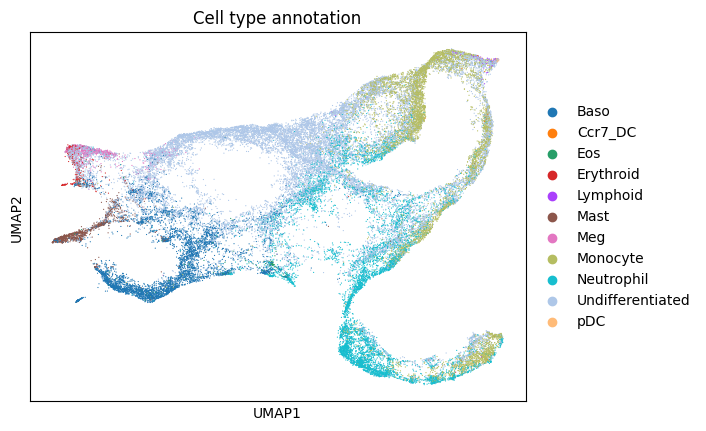

In [10]:
sc.pl.umap(adata,
           color='Cell type annotation')

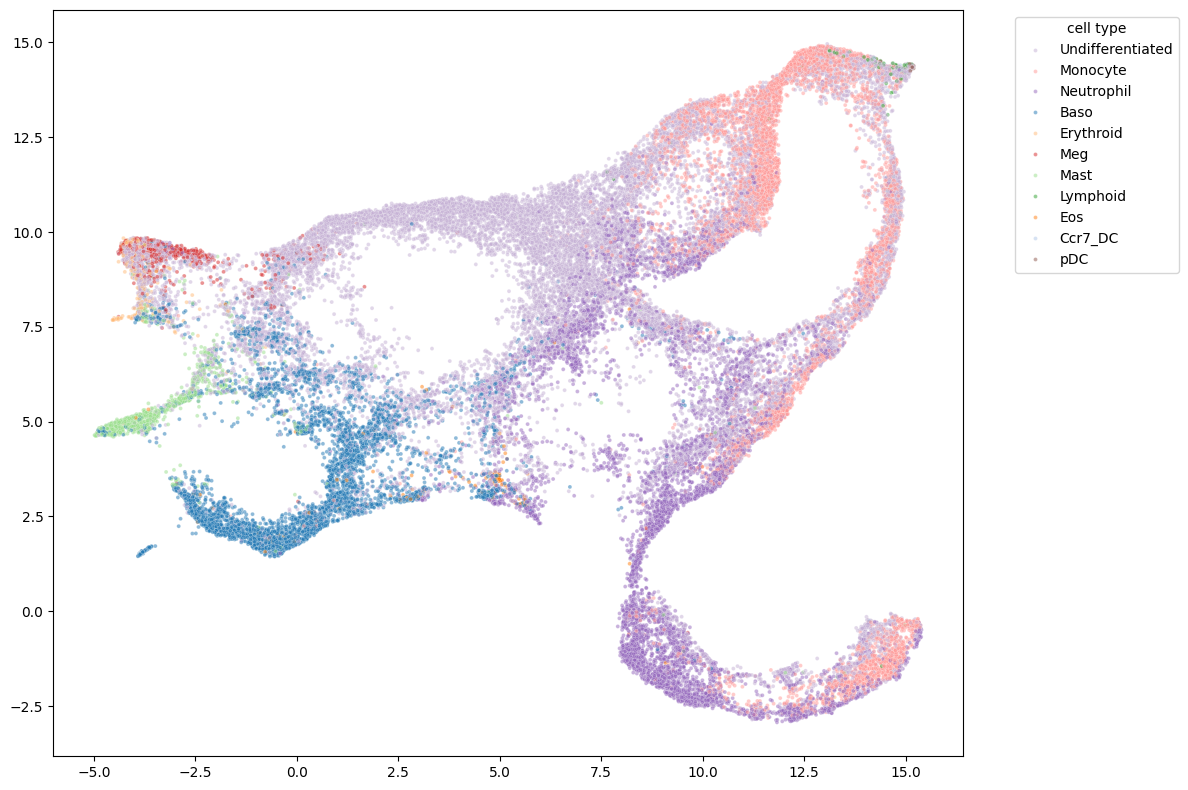

In [13]:
categories = adata.obs['Cell type annotation'].to_numpy()  

# Map each unique category to a specific color
unique_categories = np.unique(categories)
# Select a colormap
colormap = sns.color_palette("tab20", len(unique_categories))
category_to_color = {category: colormap[i] for i, category in enumerate(unique_categories)}

# Convert categories to colors
category_colors = np.array([category_to_color[category] for category in categories])

# Plot the UMAP embedding with dots colored according to 'categories'
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=categories, palette=category_to_color, s=8, alpha=0.5)
plt.legend(title="cell type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# convert this into R
adata.write_h5ad("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/Joshua/out/kevin/Writeup3/Writeup3_Larry_scBaseEncoderFeat_Z_bs30_tau05.h5ad")